# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Data Preprocessing

In [2]:
# loading the dataset
dataset=pd.read_csv("mall-customers.csv")

In [3]:
# finding the shapte of our dataset
dataset.shape

(200, 5)

In [4]:
#check last rows in dataset
dataset.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
#check first 5 rows in dataset
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# get information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# check null values in the dataset
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# get overall statistics about the dataset.
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# data Visualizations


In [9]:
# first lets identify the columns
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

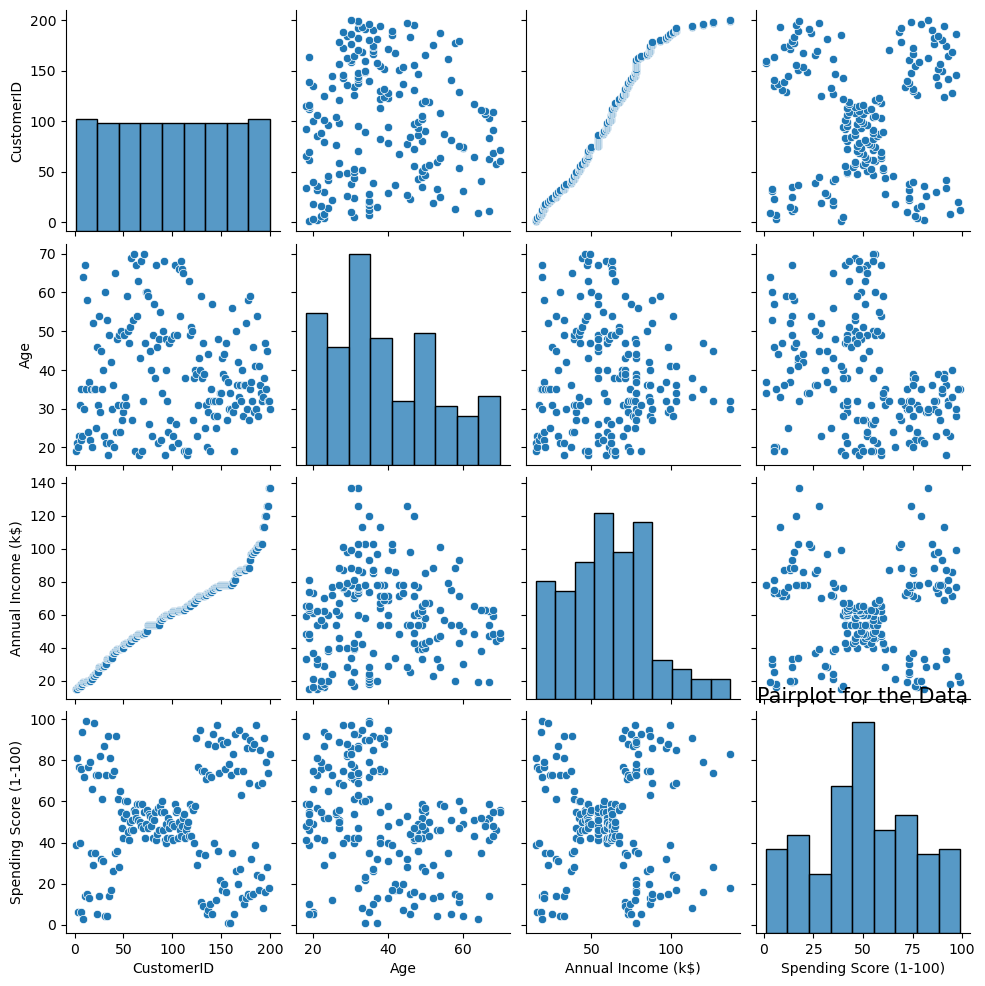

In [10]:
# creating pairplot
#provide a visual representation of the relationships and correlations between variables.
sns.pairplot(dataset)
plt.title('Pairplot for the Data', fontsize = 15)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_18156\4123089711.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True).set_title('Correlation Factors Heat Map', size='15')


Text(0.5, 1.0, 'Correlation Factors Heat Map')

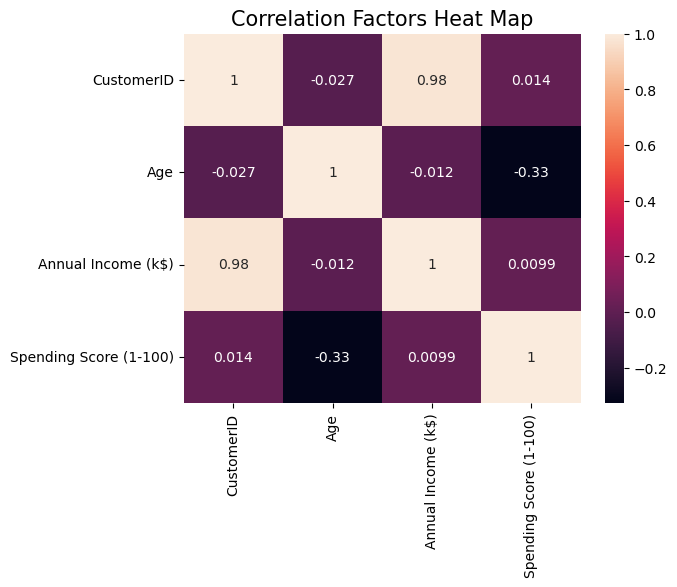

In [11]:
# creating Correlation coefficients heatmap to identify strong or weak connections
sns.heatmap(dataset.corr(), annot=True).set_title('Correlation Factors Heat Map', size='15')


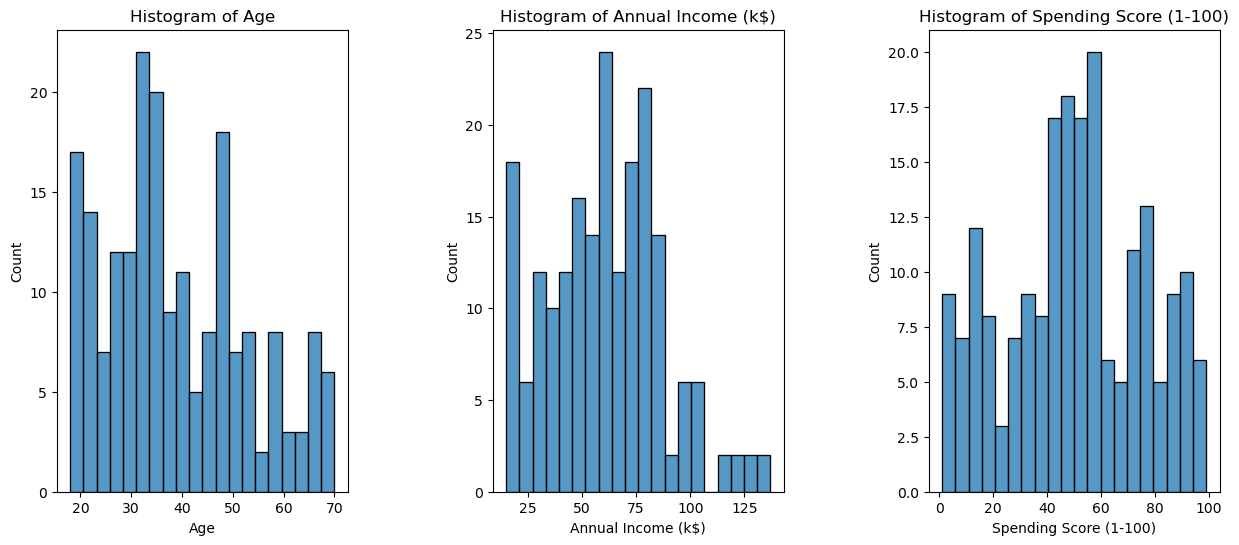

In [12]:
# histogram for age , annual income and spending score
# help identify patterns, trends, and outliers.
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(dataset[x], bins=20)
    plt.title('Histogram of {}'.format(x))
plt.show()

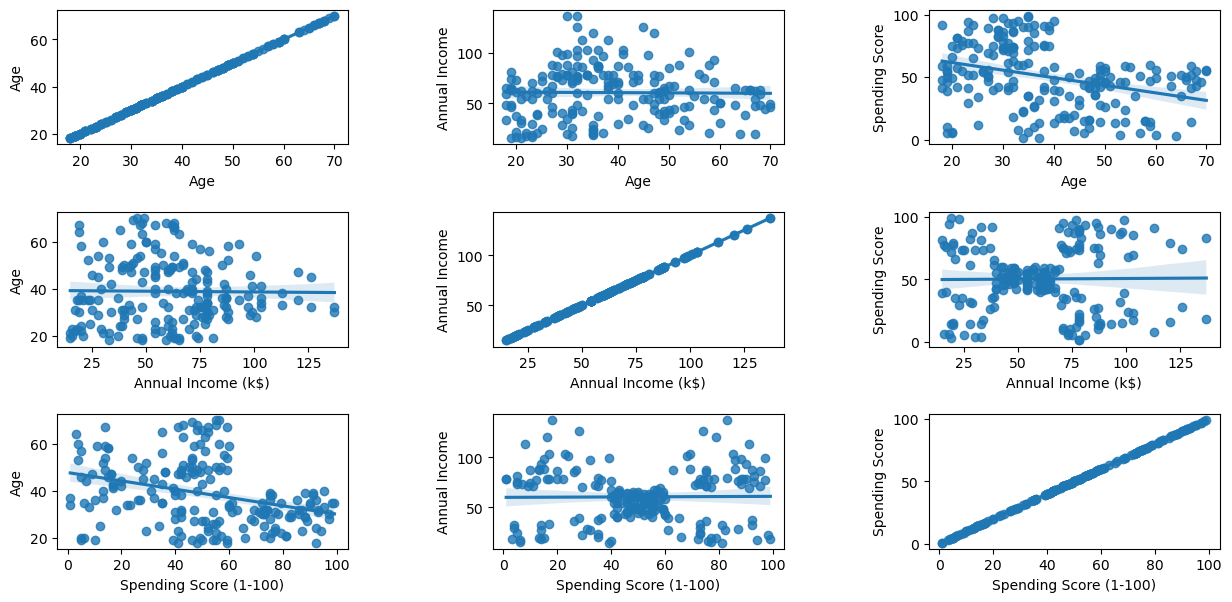

In [13]:
# Ploting the Relation between Age , Annual Income and Spending Score
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = dataset)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

## use the annual income and spending score 

## separating the dataset

In [14]:

#so sepate the two columns from the dataset.
x = dataset.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


In [15]:
k_means=KMeans()
k_means.fit(x)

C:\Users\user\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans()

In [16]:
# we get the default clusters from this
# so as shown on the  run we have 8 clusters by default
k_means=KMeans()
k_means.fit_predict(x)

C:\Users\user\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 7, 1, 1, 1, 1,
       1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 5, 7, 5, 0, 5, 0, 5,
       7, 5, 0, 5, 0, 5, 0, 5, 0, 5, 7, 5, 0, 5, 7, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 7, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3,
       6, 3])

In [17]:
# lets find optimal number of clusters using elbow method
# finding wcss value for different number of clusters
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

C:\Users\user\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMe

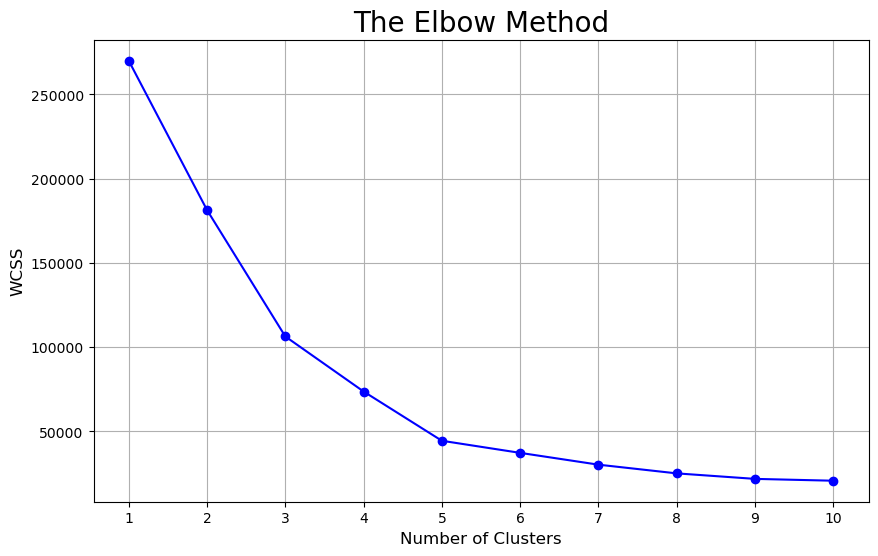

In [18]:
# Plotting the elbow curve
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.xticks(range(1, 11))  # Set the x-axis ticks
plt.grid(True)  # Add gridlines
plt.show()


In [19]:
k_means=KMeans(n_clusters=5 ,random_state=42)
y_means=k_means.fit_predict(x)

C:\Users\user\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
y_means

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

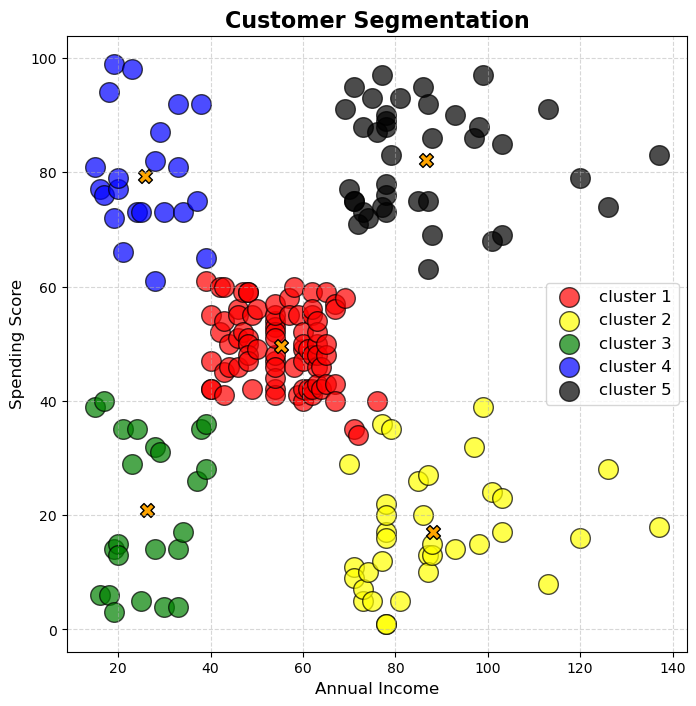

In [21]:
# use matplotlib for visualizations of clusters
# Set the figure size
plt.figure(figsize=(8, 8))

# Scatter plot for each cluster
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=200, c='red', label="cluster 1", alpha=0.7, edgecolors='k')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=200, c='yellow', label="cluster 2", alpha=0.7, edgecolors='k')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=200, c='green', label="cluster 3", alpha=0.7, edgecolors='k')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s=200, c='blue', label="cluster 4", alpha=0.7, edgecolors='k')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s=200, c='black', label="cluster 5", alpha=0.7, edgecolors='k')

# Scatter plot for cluster centers
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=100, marker='X', c='orange', edgecolors='k')

# Set the title and axis labels
plt.title("Customer Segmentation", fontsize=16, fontweight='bold')
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Spending Score", fontsize=12)

# Display the legend
plt.legend(fontsize=12)

# Display a grid
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


# model evalutation with different inputs

In [24]:
y_means[[23,35]]

array([3, 3])

## save the file

In [22]:
import pickle

# Save the K-means clustering model as a pickle file
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(k_means, file)


# the end